In [6]:
import pandas as pd
data=pd.read_csv(r"C:\Users\abith\Downloads\US_Accidents_Dec21_updated.csv\US_Accidents_Dec21_updated.csv")
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [9]:
pip install geopandas

                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB 960.0 kB/s eta 0:00:02
     ---------                                0.3/1.1 MB 3.2 MB/s eta 0:00:01
     --------------------                     0.6/1.1 MB 5.1 MB/s eta 0:00:01
     --------------------------               0.7/1.1 MB 4.3 MB/s eta 0:00:01
     -----------------------------------      1.0/1.1 MB 4.5 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 4.7 MB/s eta 0:00:00
                                              0.0/22.9 MB ? eta -:--:--
     -                                        0.6/22.9 MB 12.6 MB/s eta 0:00:02
     --                                       1.2/22.9 MB 14.7 MB/s eta 0:00:02
     ---                                      1.7/22.9 MB 12.1 MB/s eta 0:00:02
     ---                                      2.3/22.9 MB 11.9 MB/s eta 0:00:02
     ----                                     2.7/22.9 MB 12.3 MB/s

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
from shapely.geometry import Point


# Handle missing values (dropping or imputing as appropriate)
data.dropna(subset=['Start_Lat', 'Start_Lng', 'Severity'], inplace=True)
data.fillna({'Temperature(F)': data['Temperature(F)'].mean(),
             'Wind_Chill(F)': data['Wind_Chill(F)'].mean(),
             'Humidity(%)': data['Humidity(%)'].mean(),
             'Pressure(in)': data['Pressure(in)'].mean(),
             'Visibility(mi)': data['Visibility(mi)'].mean(),
             'Wind_Speed(mph)': data['Wind_Speed(mph)'].mean(),
             'Precipitation(in)': 0}, inplace=True)


In [13]:
data['Weather_Condition'].value_counts()


Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

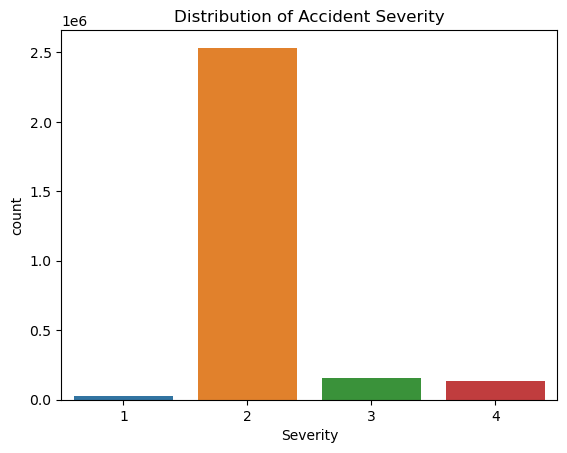

In [16]:
# Plotting the distribution of accident severity
sns.countplot(x='Severity', data=data)
plt.title('Distribution of Accident Severity')
plt.show()



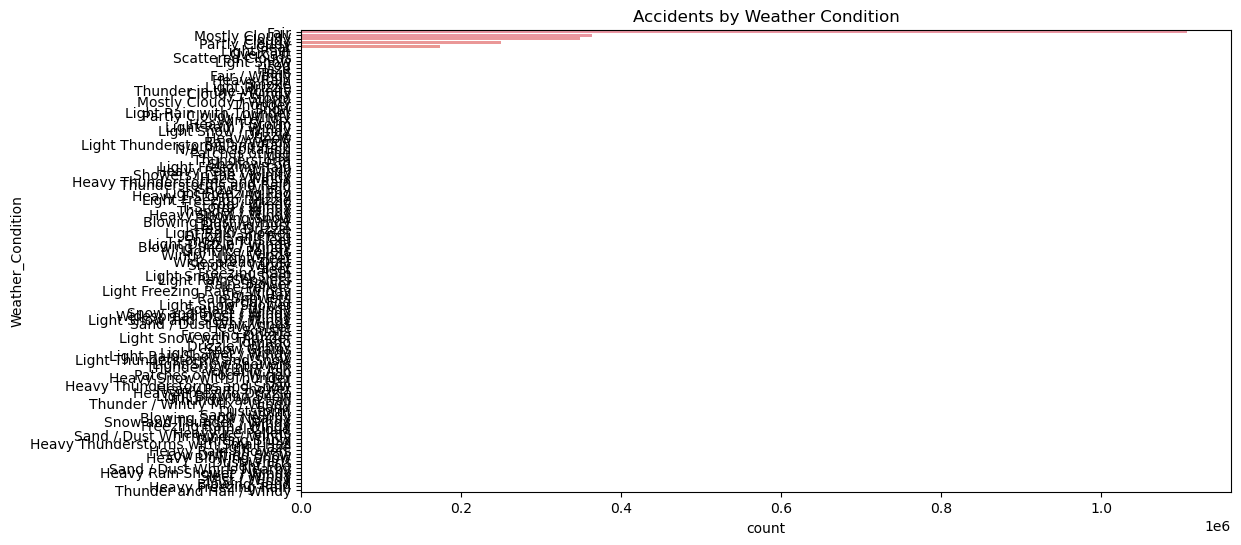

In [17]:
# Plotting the impact of weather conditions
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=data.loc[data['Weather_Condition'].isin(['Fair','Mostly Cloudy','Cloudy','Partly Cloudy','Clear'])], order=data['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.show()

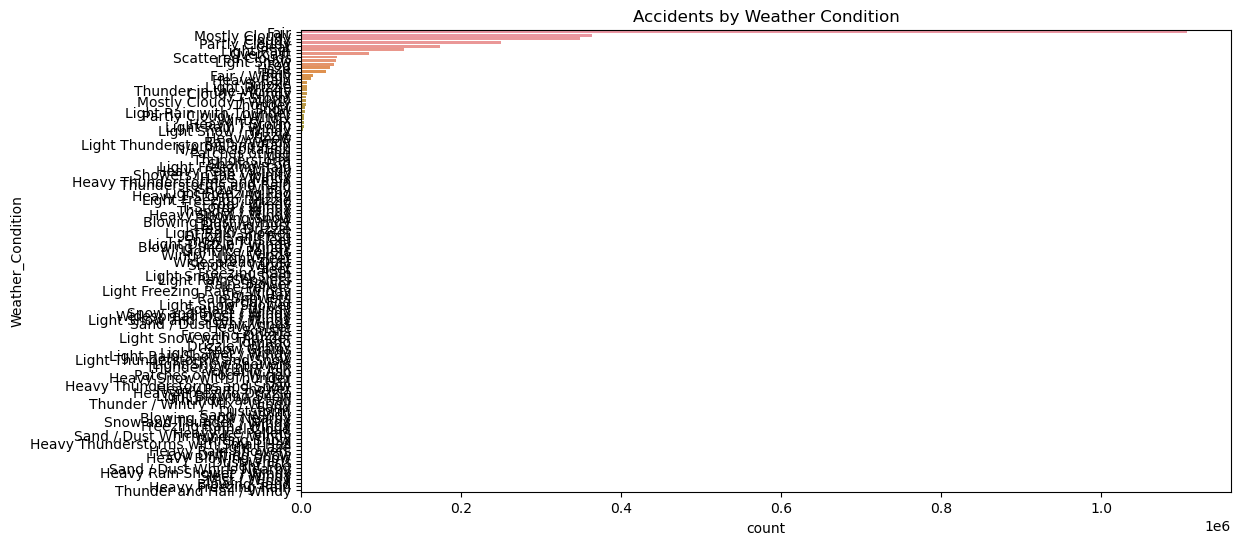

In [18]:
# Plotting the impact of weather conditions
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Condition', data=data, order=data['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.show()

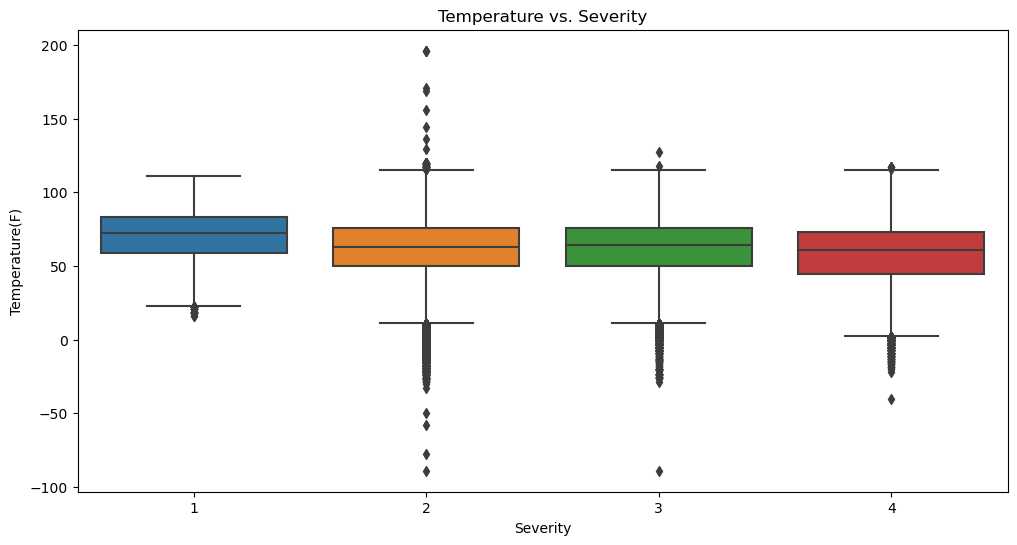

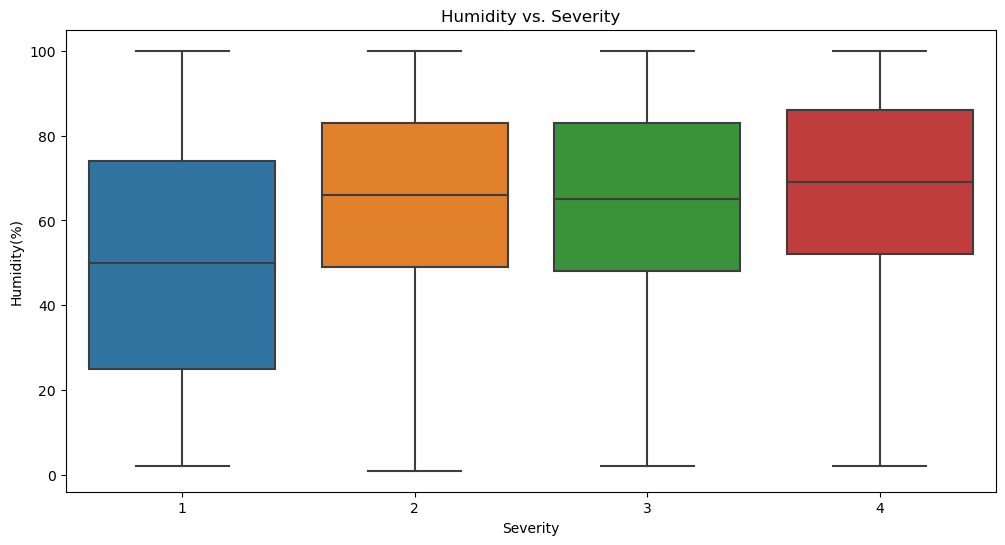

In [19]:
# Weather conditions and accident severity
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity', y='Temperature(F)', data=data)
plt.title('Temperature vs. Severity')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Severity', y='Humidity(%)', data=data)
plt.title('Humidity vs. Severity')
plt.show()


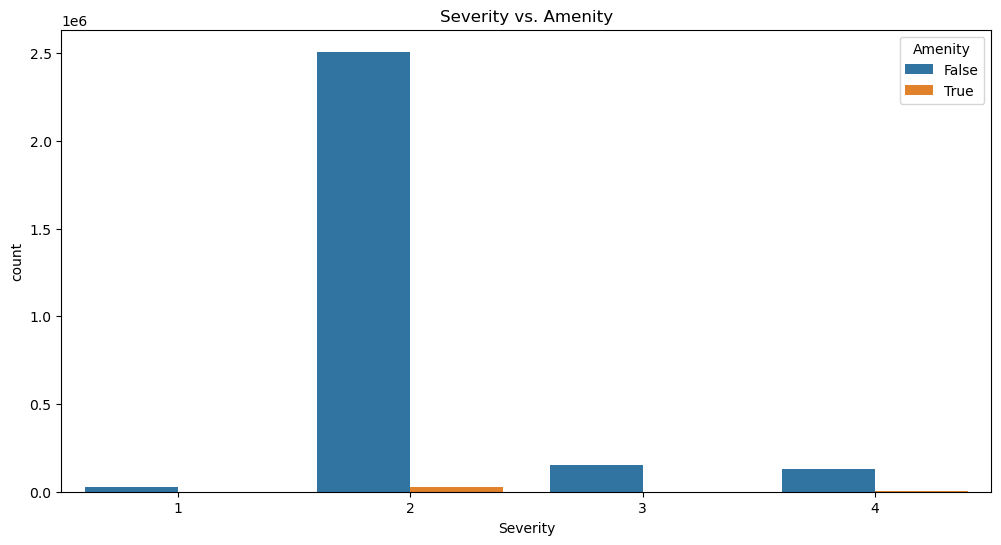

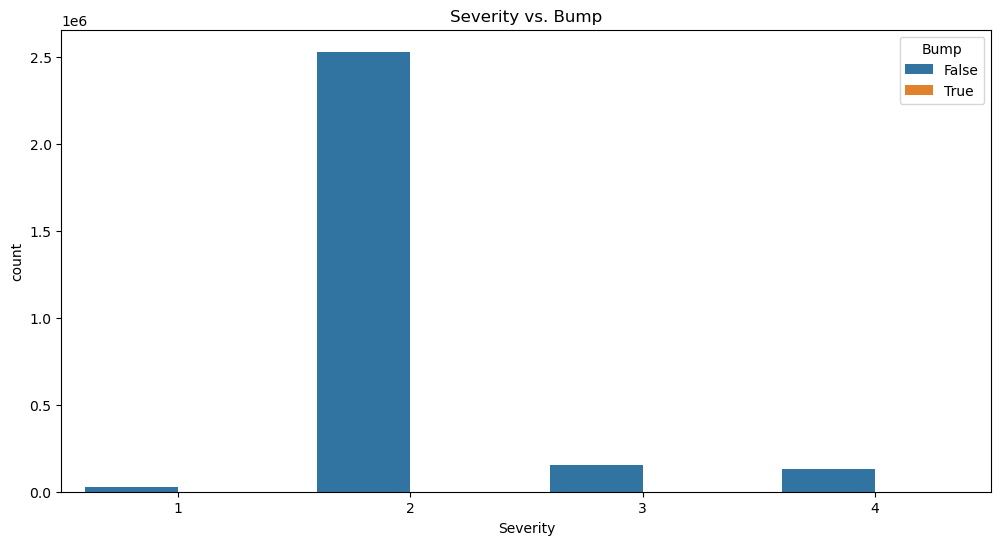

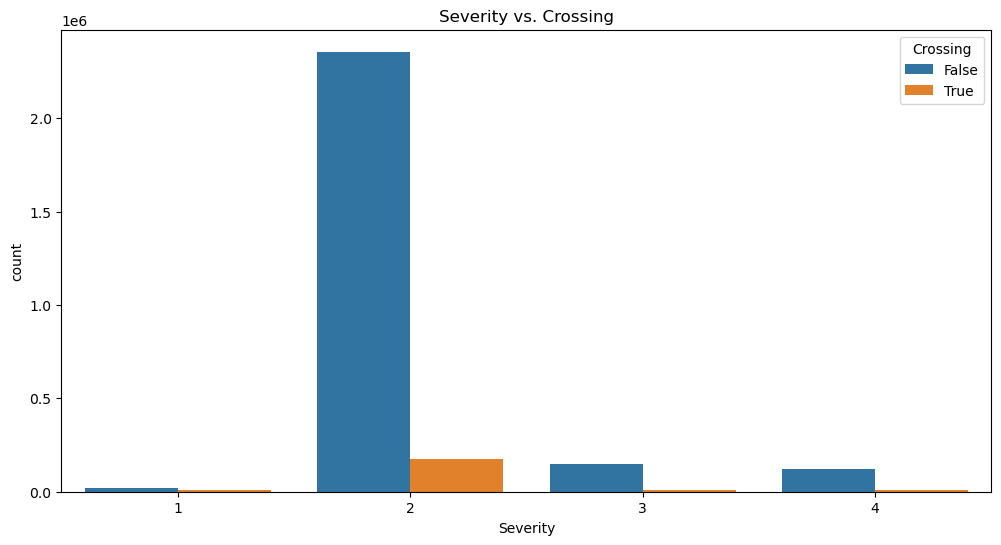

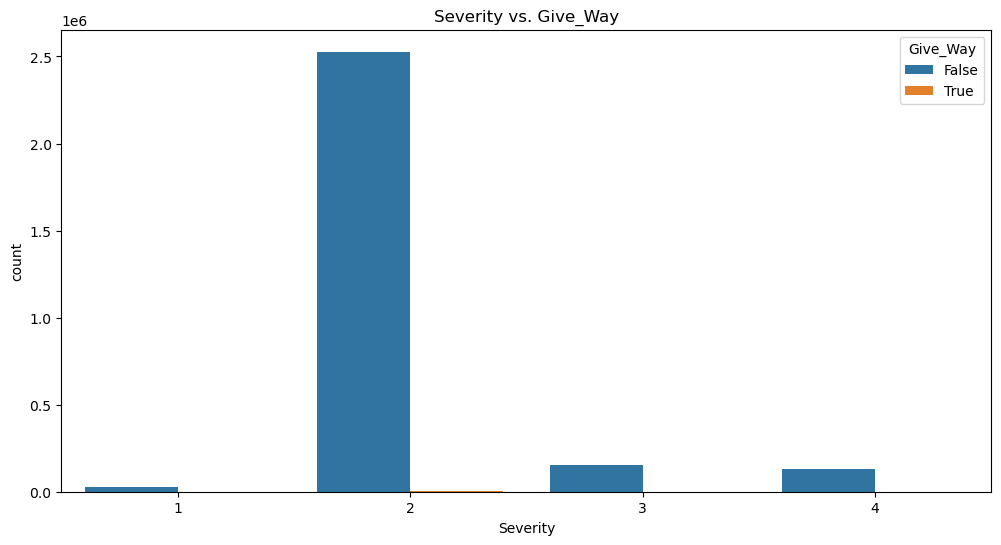

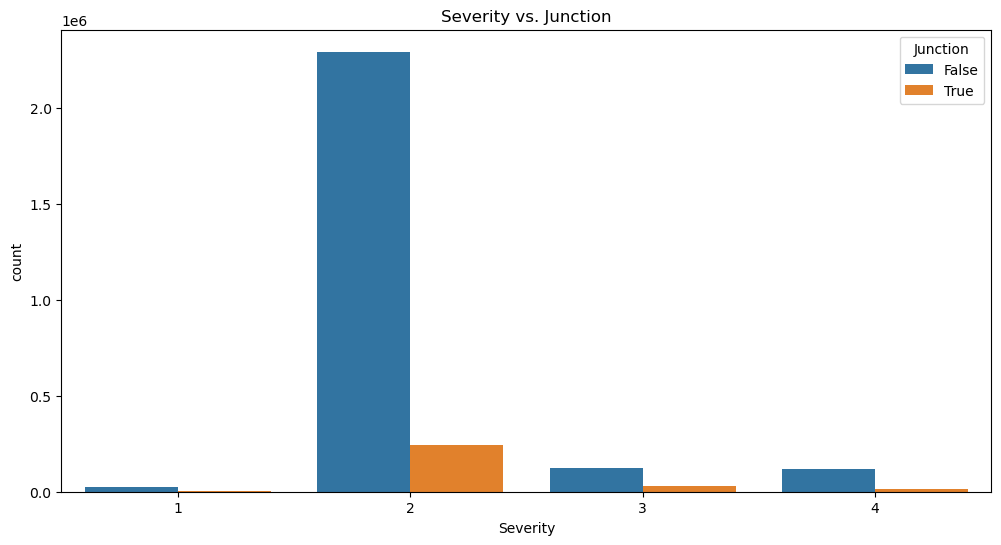

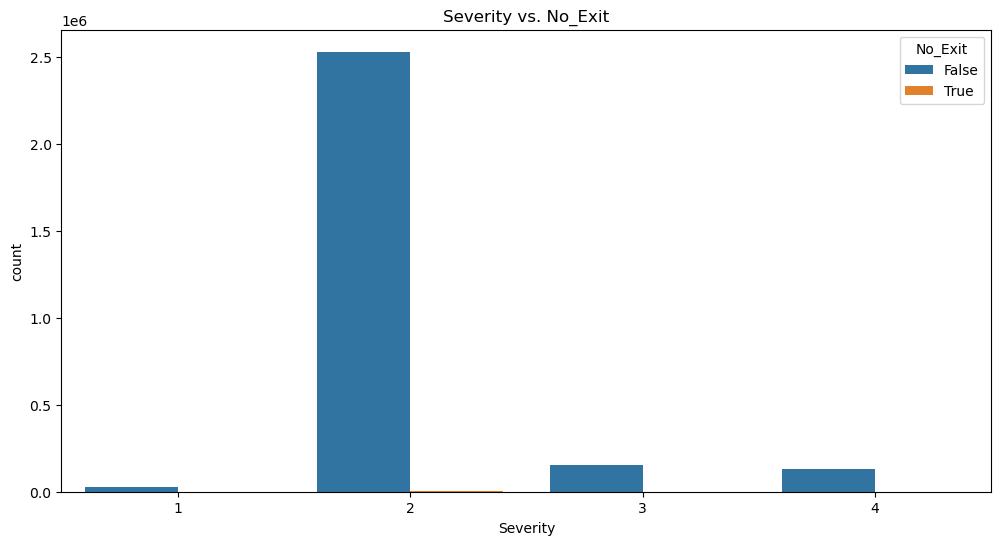

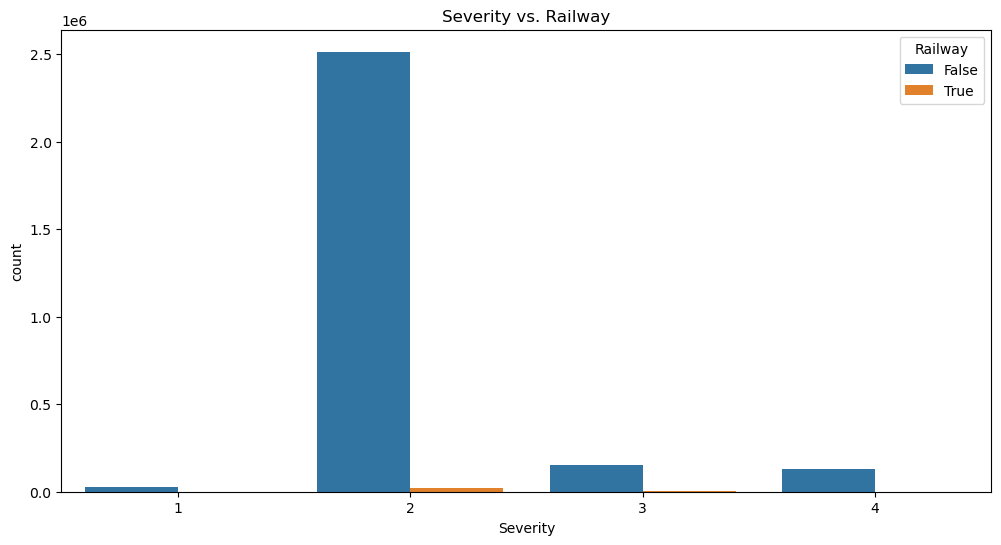

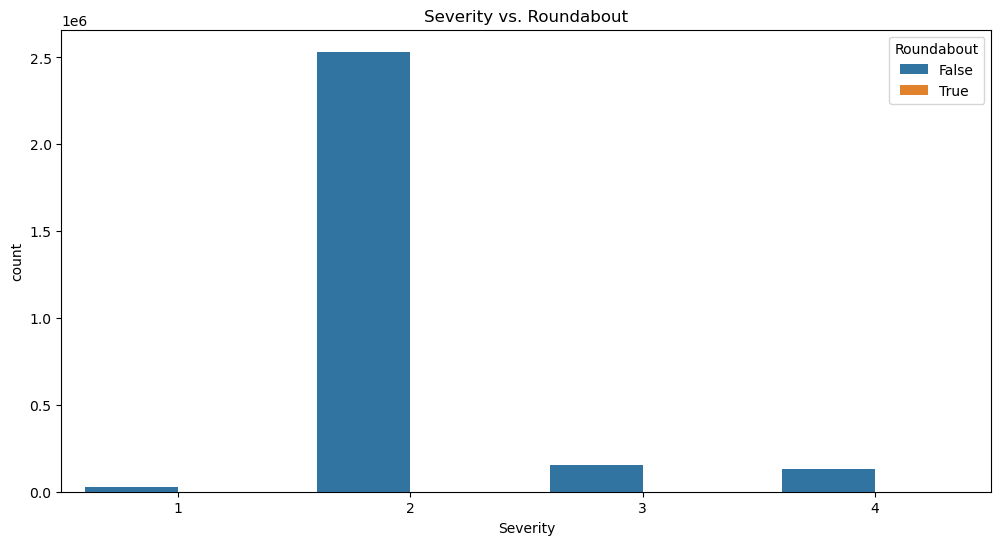

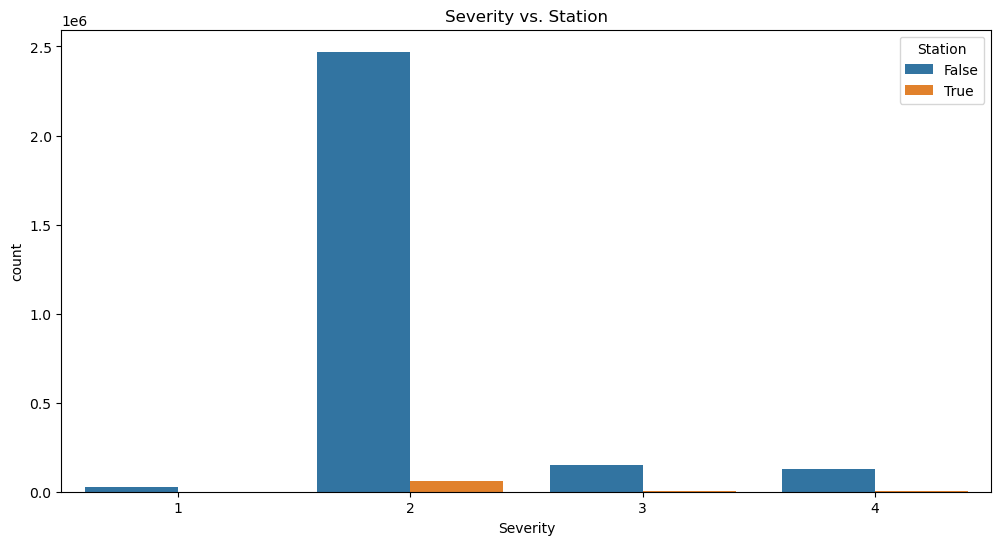

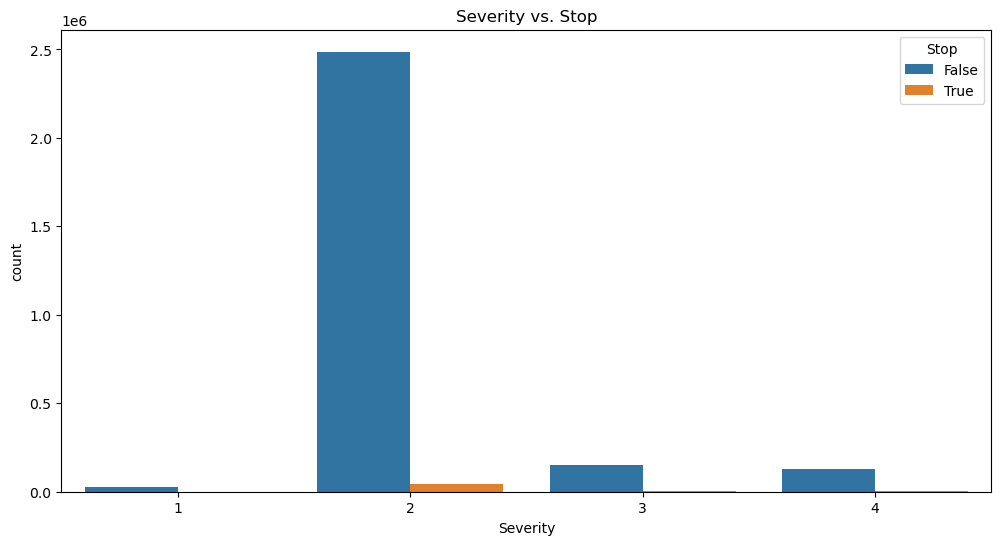

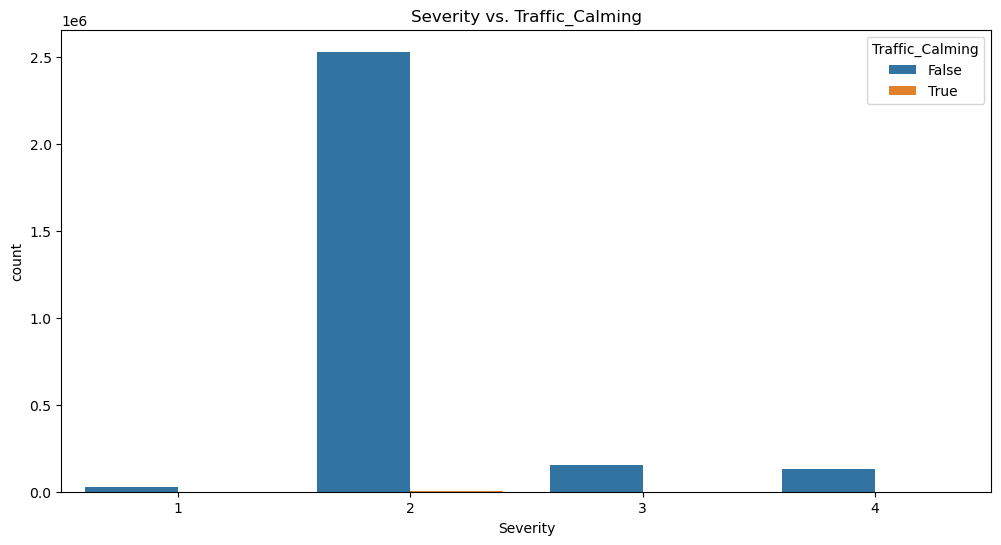

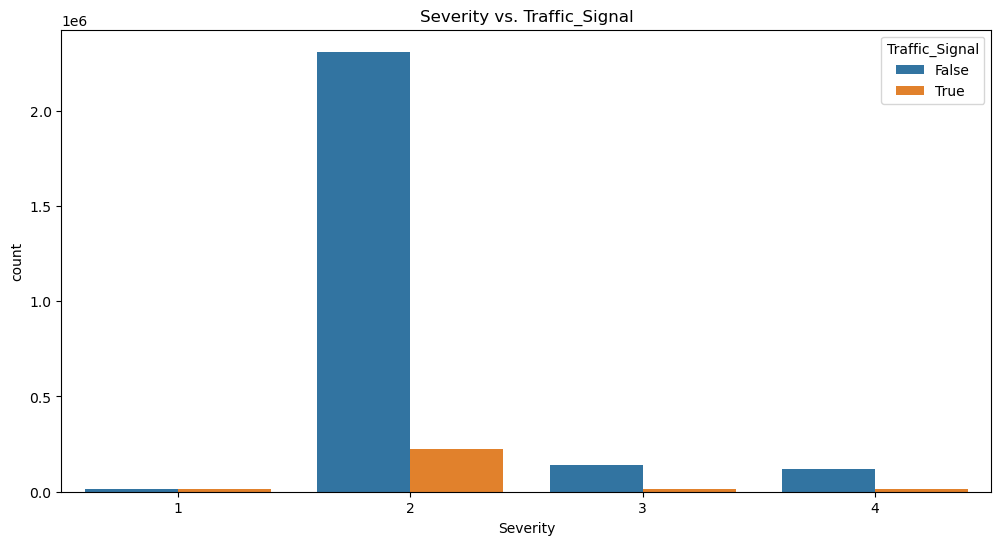

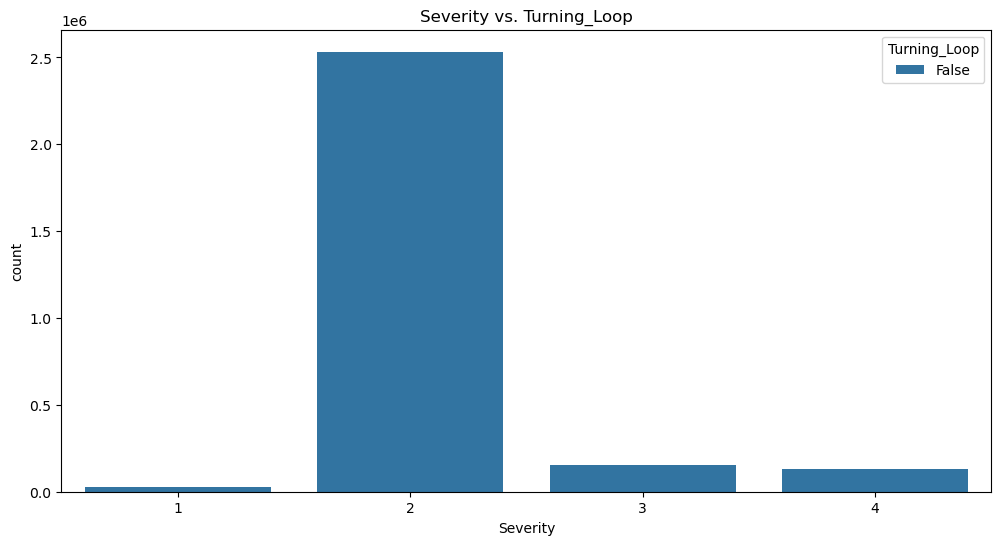

In [20]:
# Impact of road features on accident severity
features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
            'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
            'Traffic_Signal', 'Turning_Loop']

for feature in features:
    plt.figure(figsize=(12,6))
    sns.countplot(x='Severity', hue=feature, data=data)
    plt.title(f'Severity vs. {feature}')
    plt.show()


C:\Users\abith\AppData\Local\Temp\ipykernel_17932\1264824621.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1000x1000 with 0 Axes>

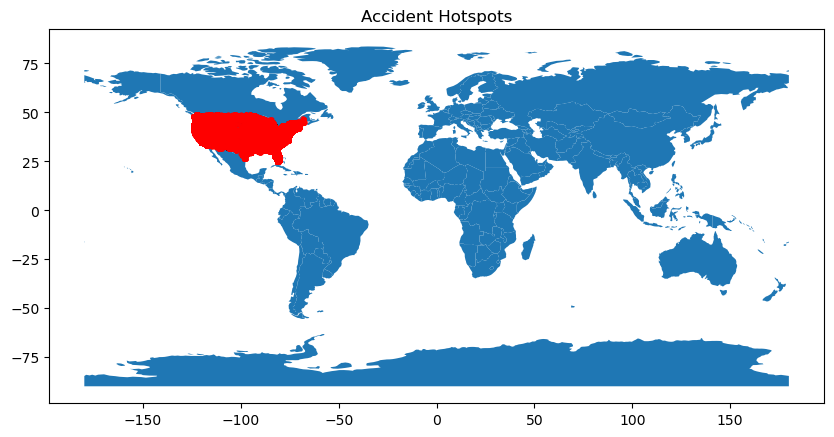

In [21]:
# Creating a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['Start_Lng'], data['Start_Lat'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Plotting accident hotspots
plt.figure(figsize=(10,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(figsize=(10, 10))
geo_df.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Accident Hotspots')
plt.show()


C:\Users\abith\AppData\Local\Temp\ipykernel_17932\1846430538.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


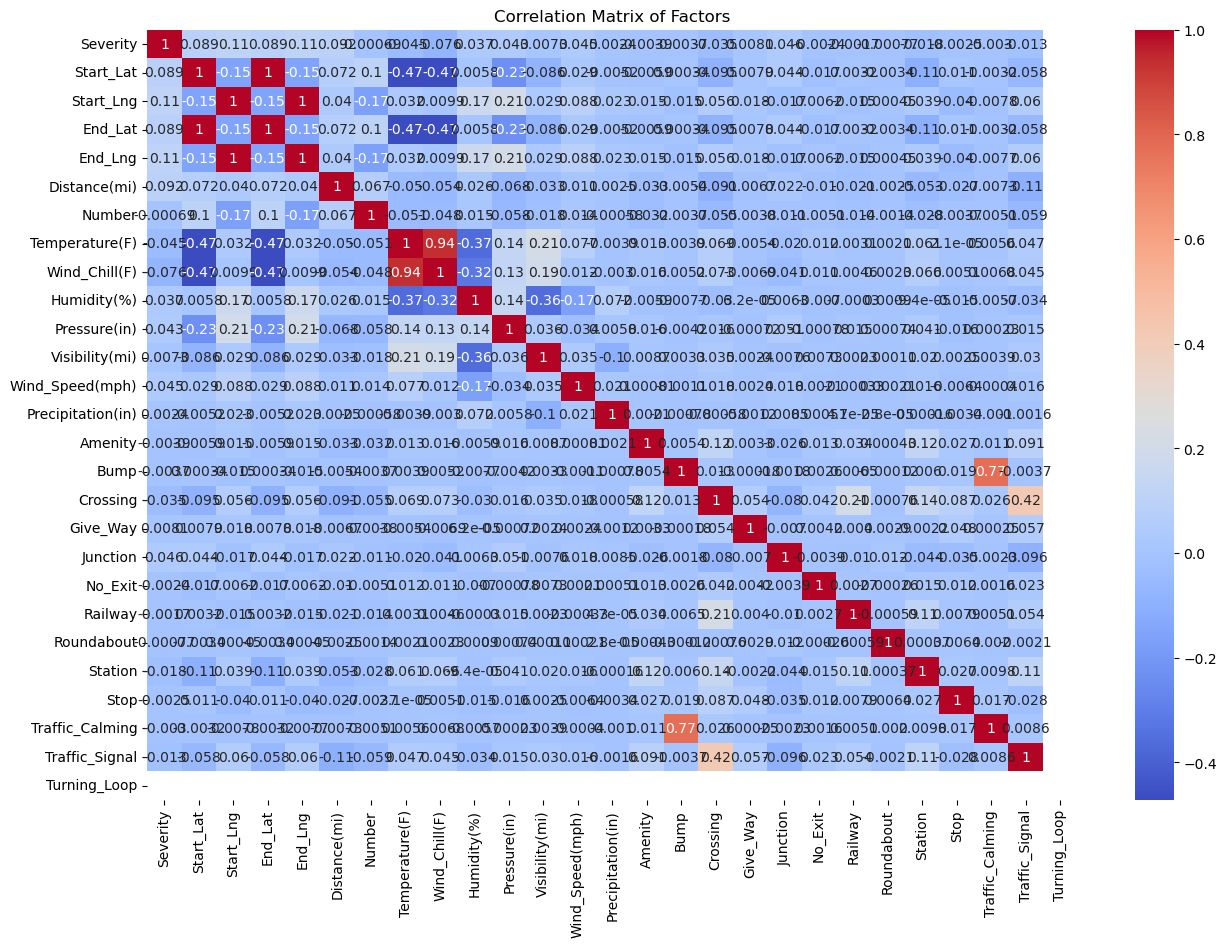

In [22]:
# Correlation analysis
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Factors')
plt.show()
